# Total proteomics targetted analysis for MYCN

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import re
import numpy as np

In [2]:
imr_lfq = pd.read_csv(r"c:\Users\Tim\OneDrive\__ThesisProject\_DryLab\Datasets\IMR5-75_totalprot\matrix.tsv", delimiter="\t")
sample_data = pd.read_excel("C:\\Users\\Tim\\OneDrive\\__ThesisProject\\_DryLab\\Datasets\\IMR5-75_totalprot\\Sample_descriptions.xlsx")
sample_groups = dict(
    zip(
        sample_data["Sample ID"],
        sample_data["Group name"].replace("DOX-","Control").values
        )
    )



In [3]:
sample_data = imr_lfq.set_index("Genes")[sample_groups.keys()]
mycn_data = pd.DataFrame(sample_data.loc["MYCN"])

# Create the treatment column
mycn_data["Treatment"] = [sample_groups[sample] for sample in mycn_data.index]

# As we are interested in the % knockdown, we take the average of the control
mean_mycn = mycn_data["MYCN"][mycn_data["Treatment"]=="Control"].mean()
mycn_data["% of Control"] = (mycn_data["MYCN"]/mean_mycn)*100

In [4]:
# Create our color pallete. 
pal =["#3b3b3b"] + [mcolors.to_hex(c) for c in sns.color_palette("Blues",3)] + ["Red","purple"]

C:\Users\Tim\AppData\Local\Temp\ipykernel_22992\3416981422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(mycn_data,


<Axes: xlabel='Treatment', ylabel='% of Control'>

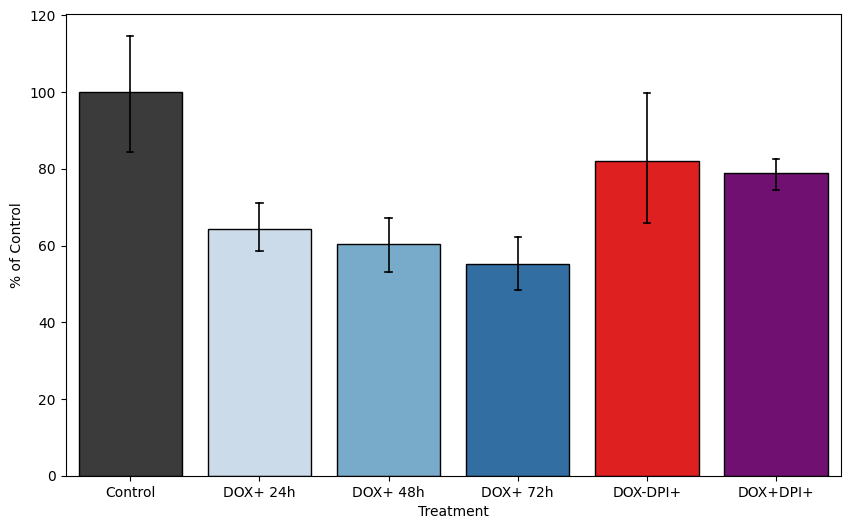

In [5]:
plt.figure(figsize=(10,6))

sns.barplot(mycn_data,
            x="Treatment",
            y="% of Control",
            palette=pal,  
            capsize=0.05,
        err_kws={
            "color": "black",    
            "linewidth": 1.2, 
        },
        edgecolor="black"
            )



# 2. Loading controls

C:\Users\Tim\AppData\Local\Temp\ipykernel_22992\3632687220.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(housekeep_data,
C:\Users\Tim\AppData\Local\Temp\ipykernel_22992\3632687220.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(housekeep_data,
C:\Users\Tim\AppData\Local\Temp\ipykernel_22992\3632687220.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(housekeep_data,
C:\Users\Tim\AppData\Local\Temp\ipykernel_22992\3632687220.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

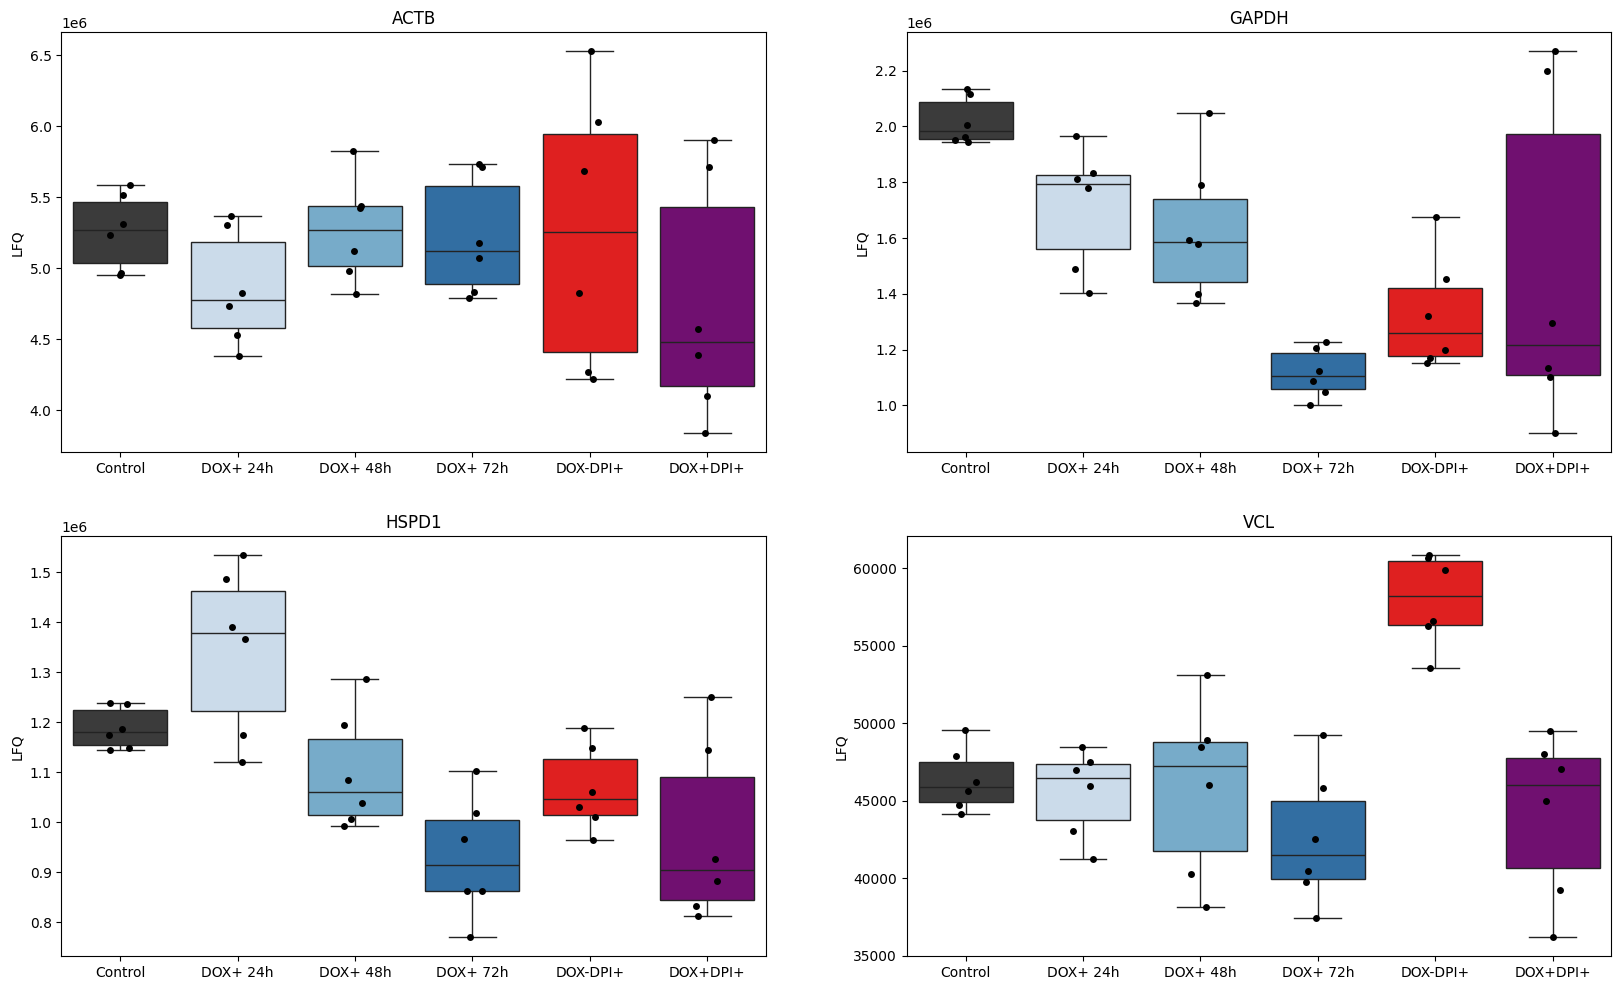

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [6]:
housekeepers = ["ACTB","GAPDH","HSPD1","VCL"]
fig, axs =plt.subplots(ncols=2,nrows=2,figsize=(20,12))

for gene,ax in zip(housekeepers,axs.flatten()):
    lfq_vals = sample_data.loc[gene]
    if isinstance(lfq_vals,pd.DataFrame):
        # GAPDH has two rows...possibly different isoforms?
        # so we sum them as presumably antibodies bind the same epitope on both forms
        lfq_vals = lfq_vals.sum()
        lfq_vals.name = gene

    housekeep_data = pd.DataFrame(lfq_vals) 

    housekeep_data["Treatment"] = [sample_groups[sample] for sample in housekeep_data.index]


    plt.figure(figsize=(10,6))

    sns.boxplot(housekeep_data,
                x="Treatment",
                y=gene,
                palette=pal,  
                ax = ax
                    )
    
    sns.stripplot(housekeep_data,
                x="Treatment",
                y=gene,
                ax = ax,
                color="black"
                    )
    

    ax.set_title(gene)
    ax.set_xlabel(None)
    ax.set_ylabel("LFQ")


fig.savefig(r"C:\Users\Tim\OneDrive\__ThesisProject\Figures\Appendix2_loadingc\LoadingPlot_boxed.svg",dpi=600)